In [12]:
train_graphs, test_graphs, train_labels = load_data()

c:\Users\FRACTAL\Downloads\kernelchallenge-master\main.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_graphs = np.array(pkl.load(file))
c:\Users\FRACTAL\Downloads\kernelchallenge-master\main.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_graphs = np.array(pkl.load(file))


In [13]:
print(train_graphs.shape)

(6000,)


In [14]:
print(train_graphs[10])

Graph with 27 nodes and 26 edges


In [15]:
print(train_labels)

[0 0 0 ... 0 0 0]


(array([5445.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         555.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

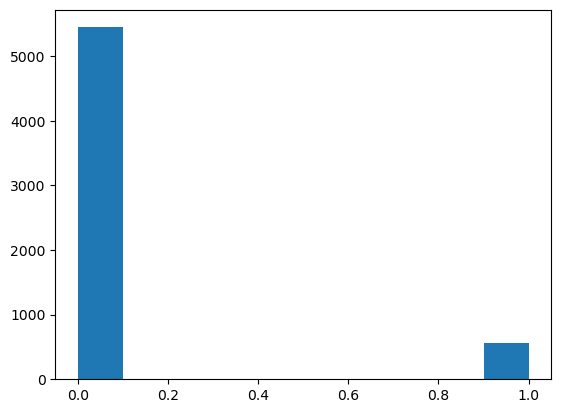

In [16]:
import matplotlib.pyplot as plt

plt.hist(train_labels)

In [17]:
from main import load_data, test_classifier, kfold_test, compute_predictions
import matplotlib.pyplot as plt

from algos.kernelrr import KernelRR

from kernels.feature_vector_kernels import DegreeHistogramKernel, EdgeLabelHistogramKernel
from kernels.graph_kernels import WLKernel
from kernels.combine_kernels import SumKernel

import pickle as pkl
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, KFold

import warnings

from sklearn import metrics

In [18]:


def kfold_test_details(graph, labels, classifier, n_splits=3):
    """
    Test the classifier on the whole dataset using kfold cross-validation.
    """

    kf = KFold(n_splits=n_splits, shuffle=True, random_state=20)
    test_score = 0.

    mem_test_index = []
    mem_test_labels = []
    mem_test_preds = []

    for i, (train_index, test_index) in enumerate(kf.split(graph)):
        out1 = test_index
        out2 = labels[test_index]
        train_graphs, train_labels = graph[train_index], labels[train_index]
        test_graphs, test_labels = graph[test_index], labels[test_index]
        classifier.fit(train_graphs, train_labels)
        test_preds = classifier.predict(test_graphs)
        cur_test_score = metrics.roc_auc_score(test_labels, test_preds)
        test_score += cur_test_score
        print("Fold {}, test Accuracy {}".format(i, cur_test_score))
        out3 = test_preds
        print(out3)
        return out1, out2, out3
        mem_test_index.append(np.asarray(test_index))
        mem_test_labels.append(np.asarray(test_labels))
        mem_test_preds.append(np.asarray(test_preds))
    print("Total, test Accuracy {}".format(test_score/n_splits))

    return mem_test_index, mem_test_labels, mem_test_preds

def investigate():
    #warnings.simplefilter("ignore")
    train_graphs, test_graphs, train_labels = load_data()
    kernel = WLKernel(edge_attr=True, node_attr=True, iterations=10).kernel
    classifier = KernelRR(lmbda=5e-5, kernel=kernel, verbose=False)

    mem_test_index, mem_test_labels, mem_test_preds = kfold_test_details(train_graphs, train_labels, classifier, n_splits=3)
    return mem_test_index, mem_test_labels, mem_test_preds

In [19]:
mem_test_index, mem_test_labels, mem_test_preds = investigate()

c:\Users\FRACTAL\Downloads\kernelchallenge-master\main.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_graphs = np.array(pkl.load(file))
c:\Users\FRACTAL\Downloads\kernelchallenge-master\main.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_graphs = np.array(pkl.load(file))
c:\Users\FRACTAL\Downloads\kernelchallenge-master\utils\utils.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

In [ ]:
metrics.plot_roc_curve(mem_test_preds[0],mem_test_labels[0])
metrics.plot_roc_curve(mem_test_preds[1],mem_test_labels[1])
metrics.plot_roc_curve(mem_test_preds[2],mem_test_labels[2])



In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    mem_test_preds,
    mem_test_labels
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

TypeError: RocCurveDisplay.__init__() takes 1 positional argument but 3 were given

[  12   18   20   66   97  106  118  168  174  198  209  216  222  229
  231  232  245  256  283  284  326  327  349  376  381  391  394  395
  416  424  429  453  464  480  484  496  497  501  509  510  523  530
  542  554  565  569  575  576  587  596  598  606  612  648  650  654
  671  683  692  696  698  700  702  723  729  743  747  749  756  778
  792  796  836  846  868  871  875  876  882  888  894  895  900  902
  950  962  963  977  989 1011 1013 1015 1016 1018 1019 1035 1039 1050
 1052 1053 1054 1056 1060 1061 1070 1073 1080 1081 1092 1118 1120 1122
 1160 1168 1170 1176 1183 1189 1198 1205 1210 1218 1242 1265 1270 1284
 1286 1288 1291 1294 1296 1301 1302 1315 1322 1332 1354 1361 1370 1392
 1395 1404 1409 1481 1498 1577 1594 1629 1633 1634 1676 1677 1678 1706
 1719 1722 1725 1743 1763 1765 1797 1803 1840 1863 1864 1873 1882 1885
 1892 1895 1914 1924 1939 1941 1944 1945 1946 1952 1969 1993 1994 2002
 2004 2018 2036 2065 2069 2080 2093 2141 2169 2176 2178 2187 2199 2220
 2221 

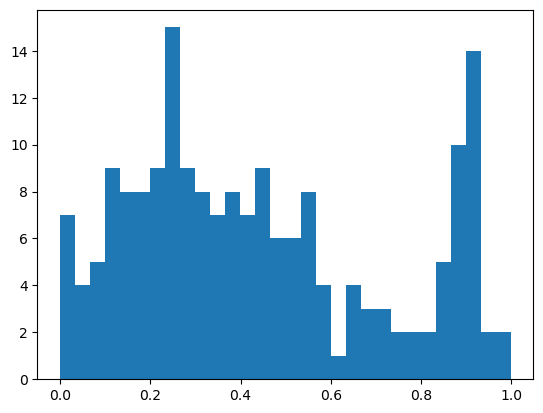

In [ ]:
plt.hist(mem_test_preds[mem_test_labels==1], bins = 30 )
#plt.hist(mem_test_preds[mem_test_labels==0], bins = 30 )
print(mem_test_index[(mem_test_labels == 0) & (mem_test_preds < .01)])

[  12   18   20   66   97  106  118  168  174  198  209  216  222  229
  231  232  245  256  283  284  326  327  349  376  381  391  394  395
  416  424  429  453  464  480  484  496  497  501  509  510  523  530
  542  554  565  569  575  576  587  596  598  606  612  648  650  654
  671  683  692  696  698  700  702  723  729  743  747  749  756  778
  792  796  836  846  868  871  875  876  882  888  894  895  900  902
  950  962  963  977  989 1011 1013 1015 1016 1018 1019 1035 1039 1050
 1052 1053 1054 1056 1060 1061 1070 1073 1080 1081 1092 1118 1120 1122
 1160 1168 1170 1176 1183 1189 1198 1205 1210 1218 1242 1265 1270 1284
 1286 1288 1291 1294 1296 1301 1302 1315 1322 1332 1354 1361 1370 1392
 1395 1404 1409 1481 1498 1577 1594 1629 1633 1634 1676 1677 1678 1706
 1719 1722 1725 1743 1763 1765 1797 1803 1840 1863 1864 1873 1882 1885
 1892 1895 1914 1924 1939 1941 1944 1945 1946 1952 1969 1993 1994 2002
 2004 2018 2036 2065 2069 2080 2093 2141 2169 2176 2178 2187 2199 2220
 2221 

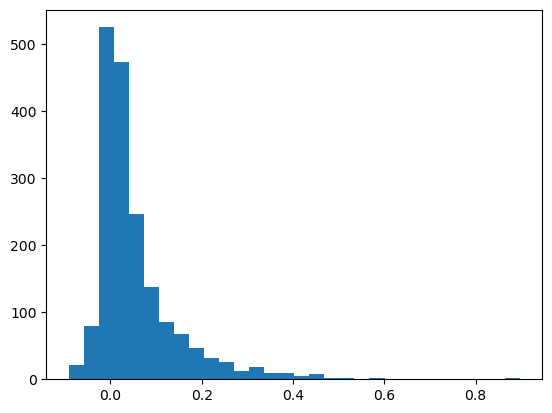

In [ ]:
plt.hist(mem_test_preds[mem_test_labels==0], bins = 30 )
#plt.hist(mem_test_preds[mem_test_labels==0], bins = 30 )
print(mem_test_index[(mem_test_labels == 0) & (mem_test_preds < .01)])

In [ ]:
import networkx as nx
train_graphs, test_graphs, train_labels = load_data()

In [ ]:
mal_predit_1 =[ 67,  246,  249,  434, 1069, 1434, 1435, 1445, 1464, 1546, 1557, 1603, 1770, 1949
, 1988, 2014, 2023, 2041, 2056, 2082, 2147, 2174, 2263, 2285, 2321, 2363, 2386, 2441
, 2443, 2594, 2774, 2778, 3238, 3350, 3746, 4114, 4773, 5137, 5368, 5632, 5724]
bien_predit_1 = [ 171,  685, 1346, 1419, 1422, 1539, 1586, 1669, 1715, 1717, 1985, 2007, 2060, 2087
, 2106, 2118, 2133, 2168, 2235, 2277, 2293, 2391, 2392, 2447, 2741, 2851, 3035, 3172
, 3316, 3484, 3510, 3575, 3753, 4112, 4259]

In [ ]:
mal_predit_0 = [442, 2450, 2950, 3712, 4242, 5109]

bien_predit_0 = [12,  18,  20,  66,  97,  106,  118,  168,  174,  198,  209,  216,  222,  229
,  231,  232,  245,  256,  283,  284,  326,  327,  349,  376,  381,  391,  394,  395
,  416,  424,  429,  453,  464,  480,  484,  496,  497,  501,  509,  510,  523,  530
,  542,  554,  565,  569,  575,  576,  587,  596,  598,  606,  612,  648,  650,  654]

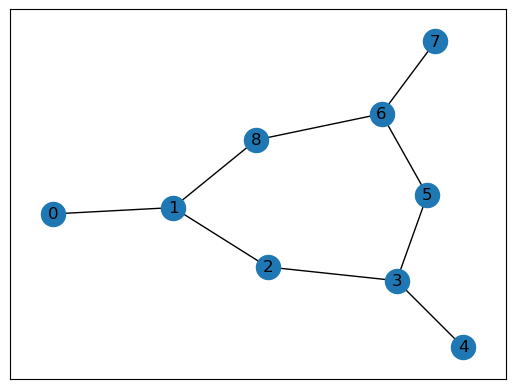

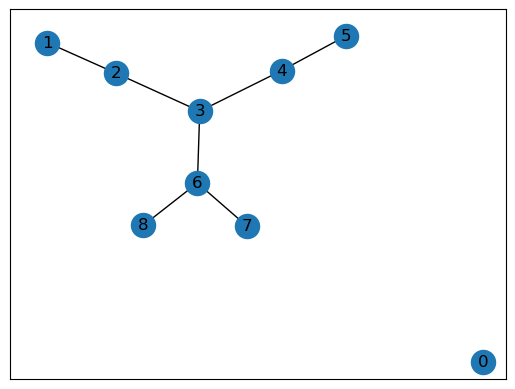

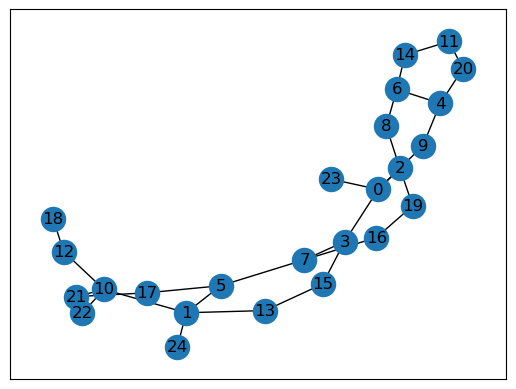

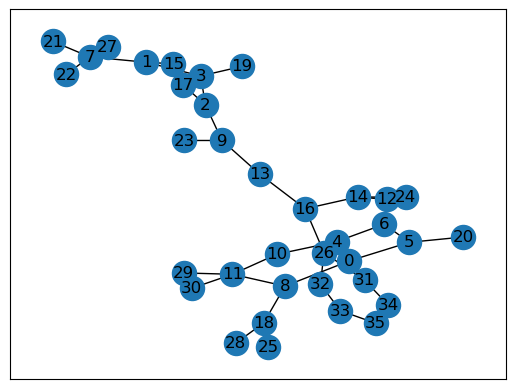

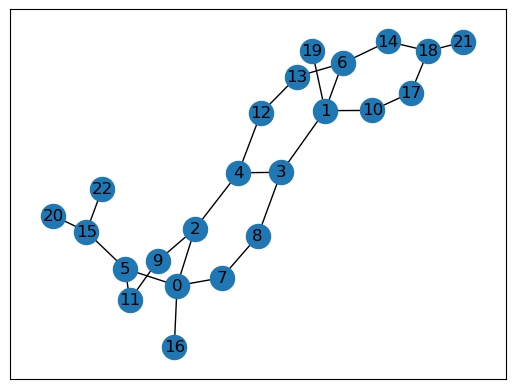

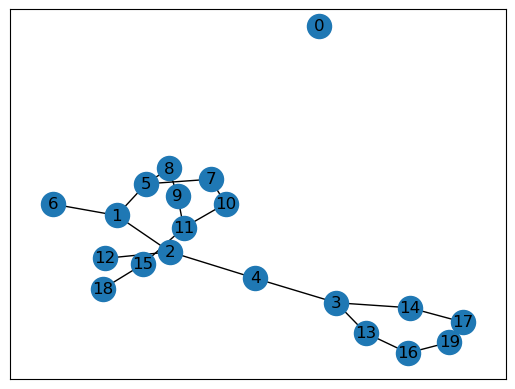

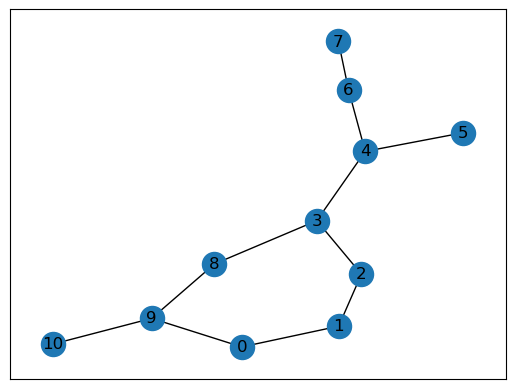

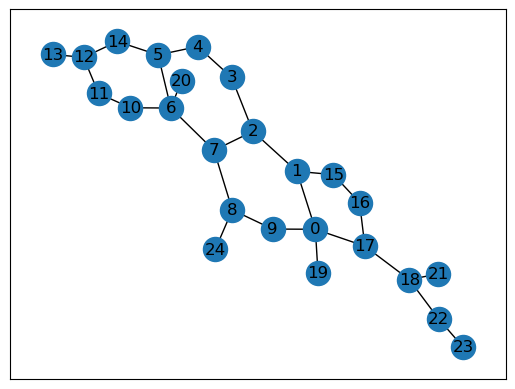

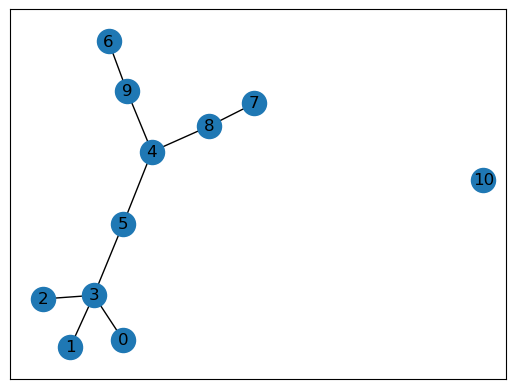

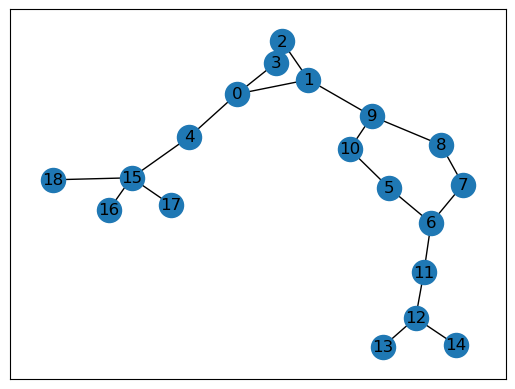

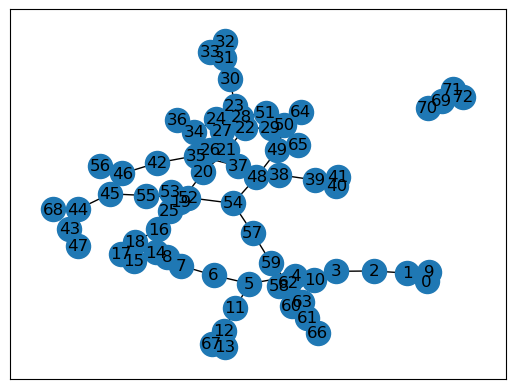

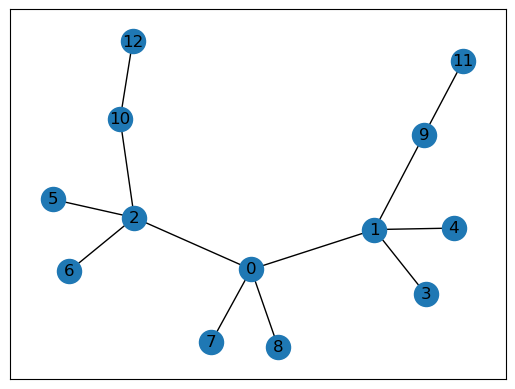

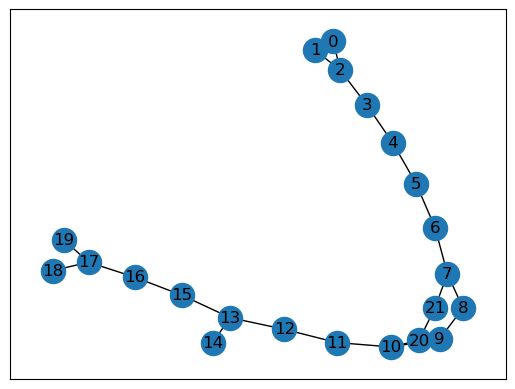

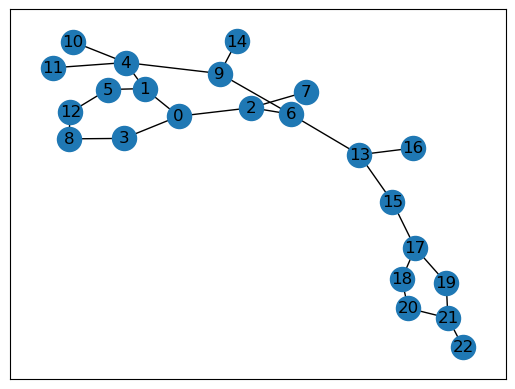

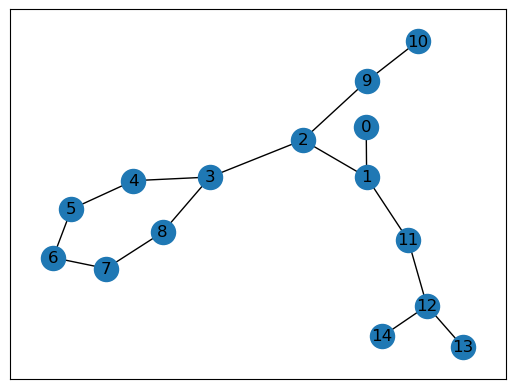

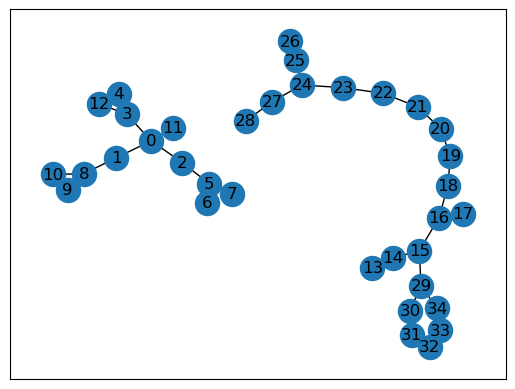

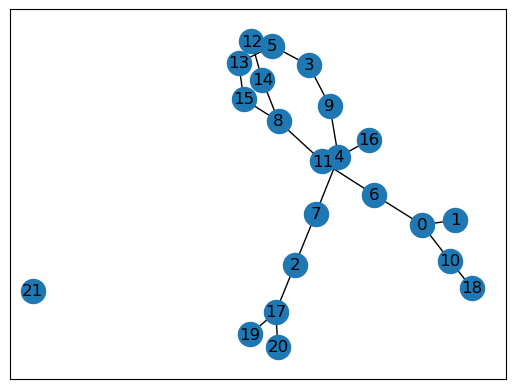

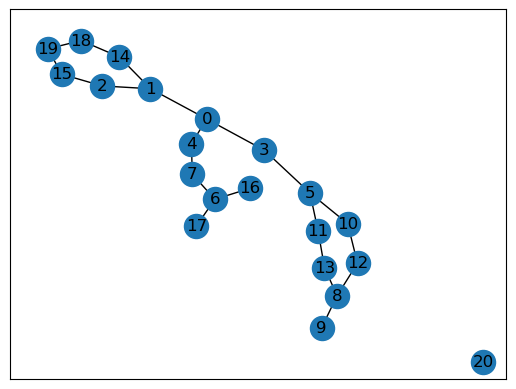

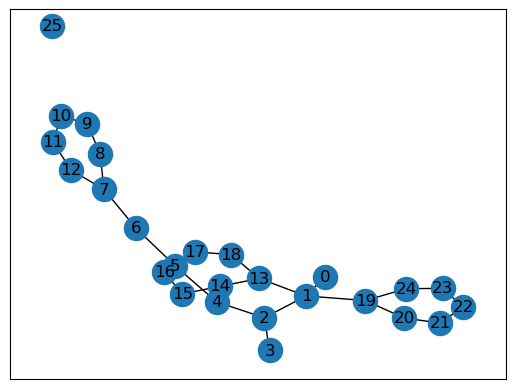

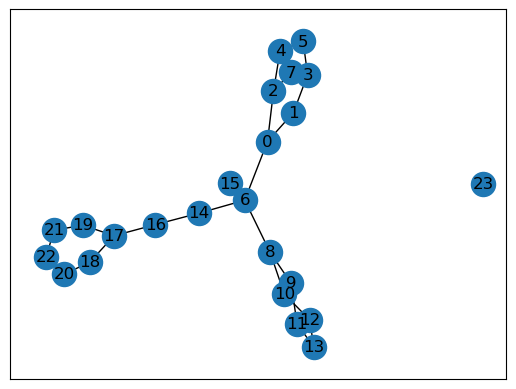

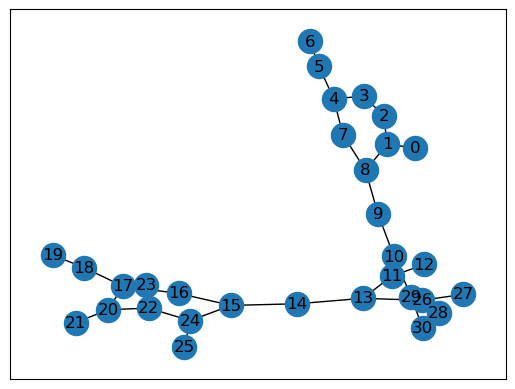

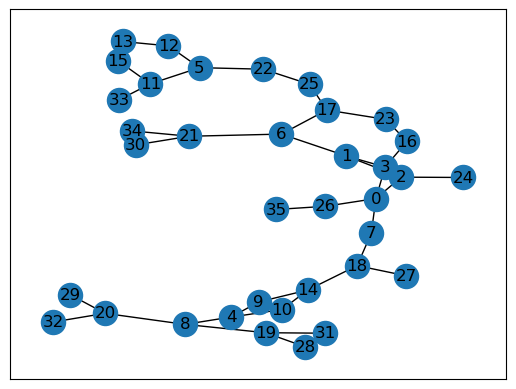

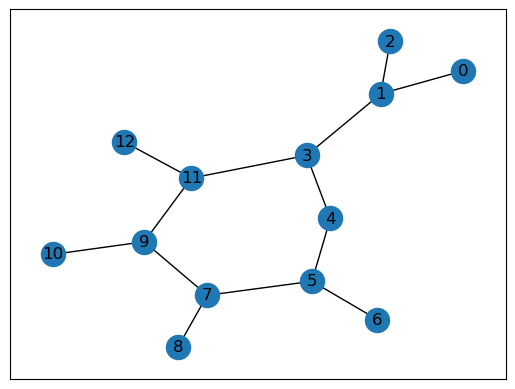

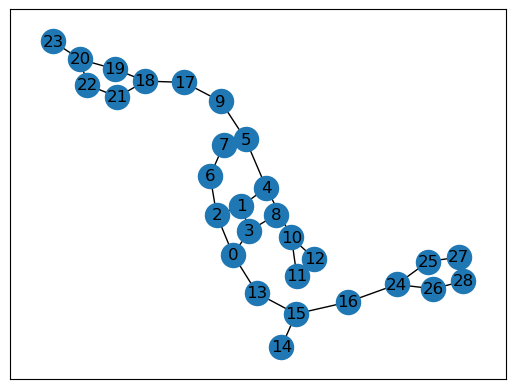

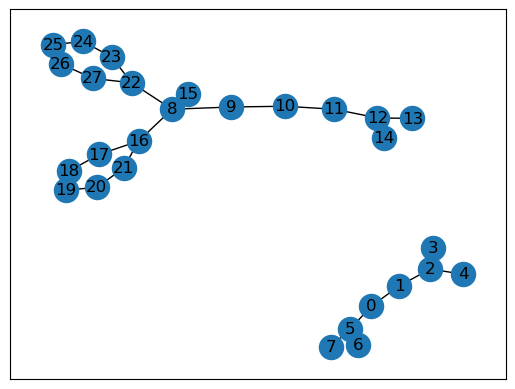

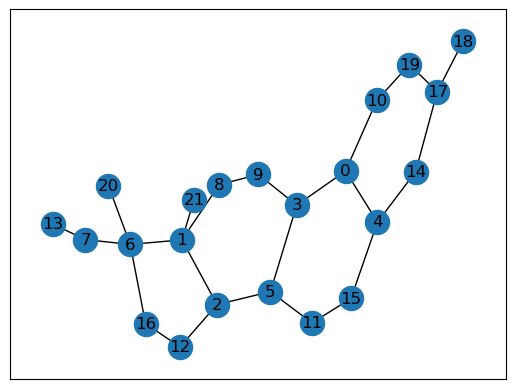

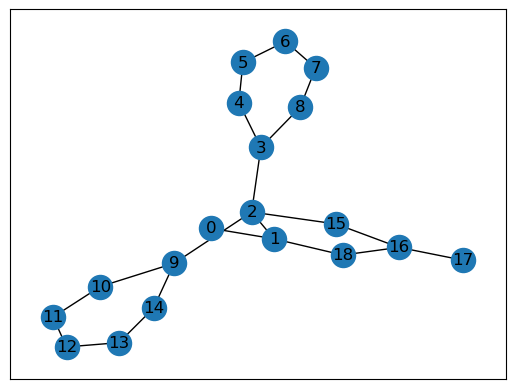

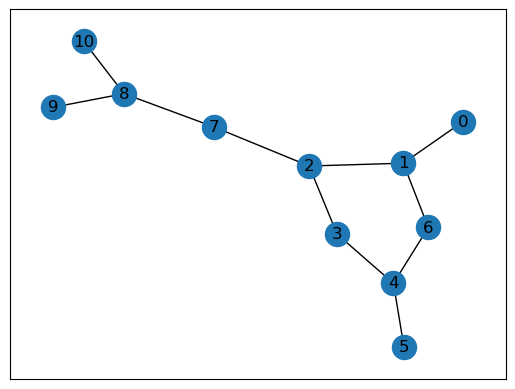

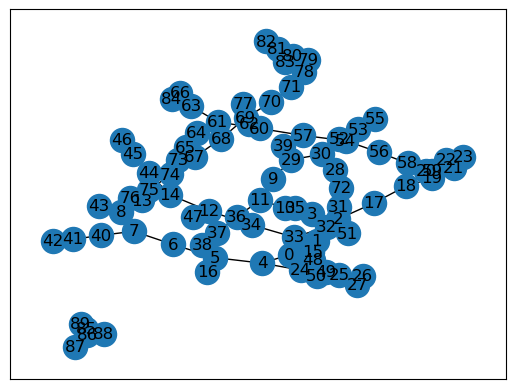

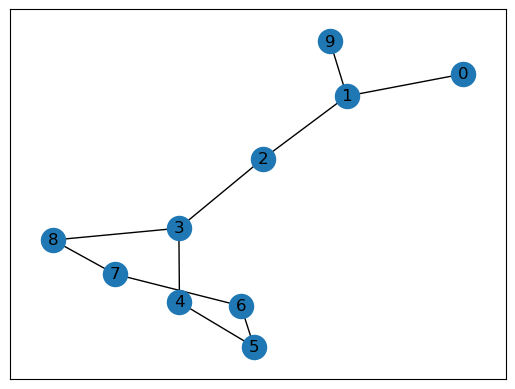

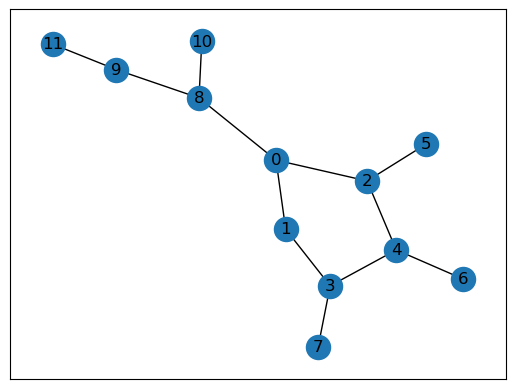

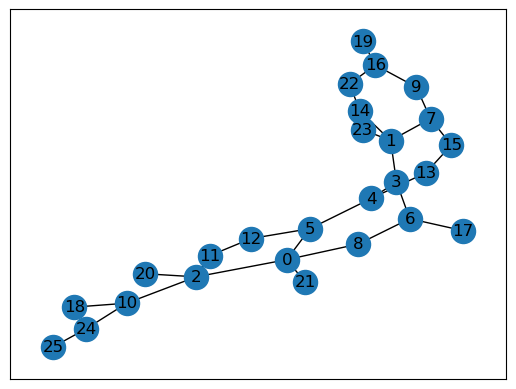

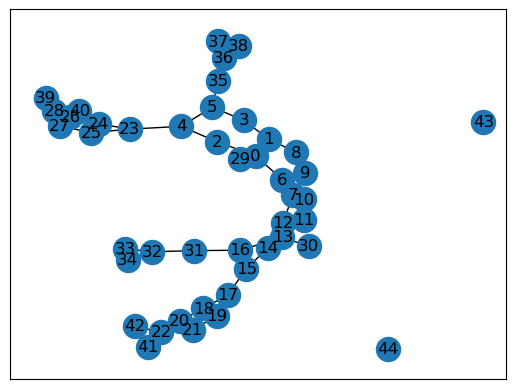

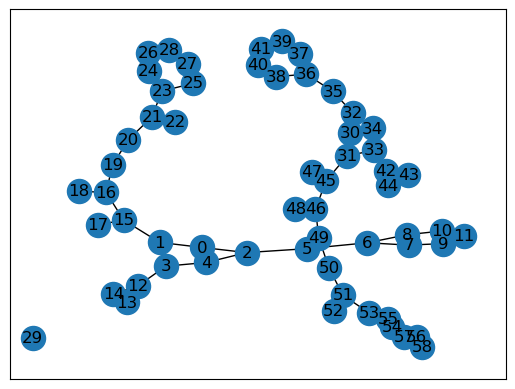

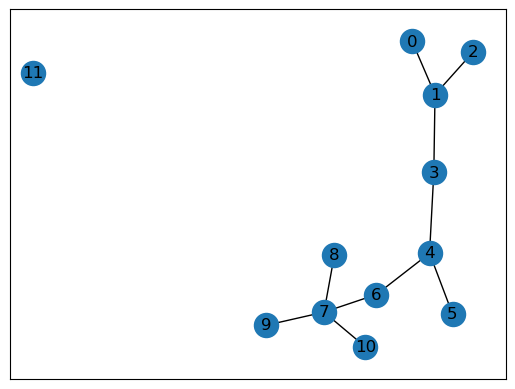

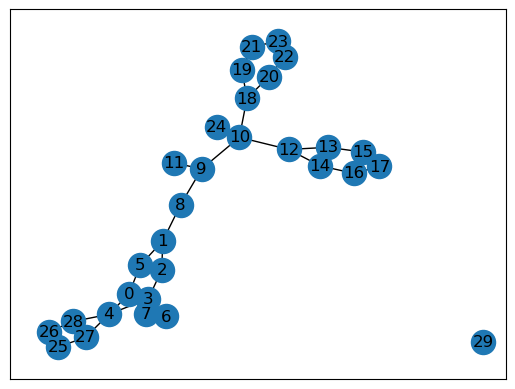

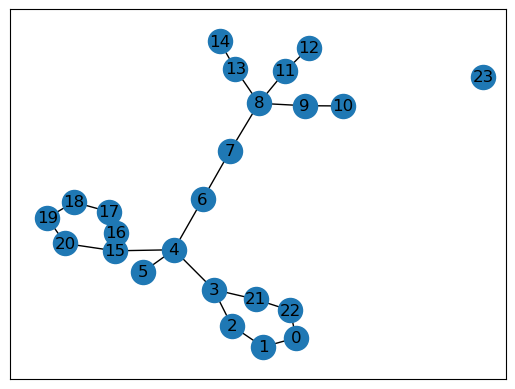

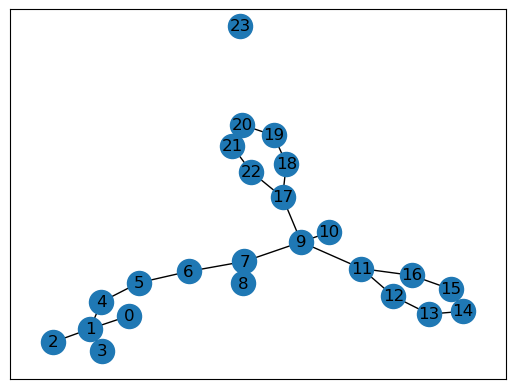

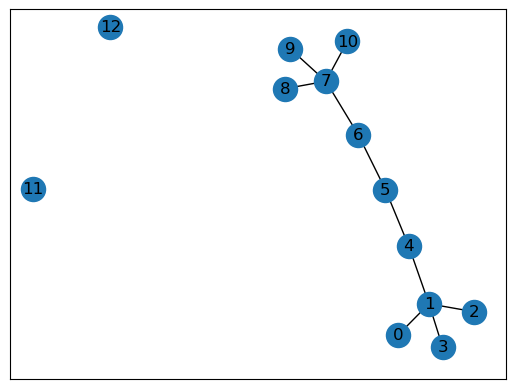

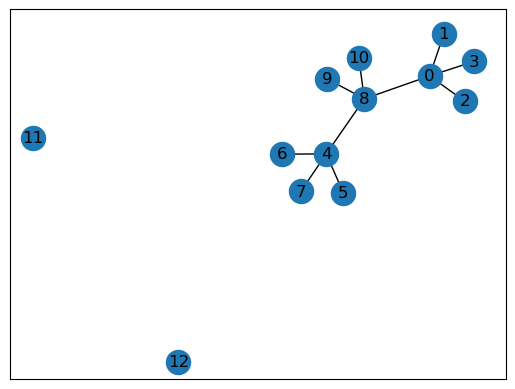

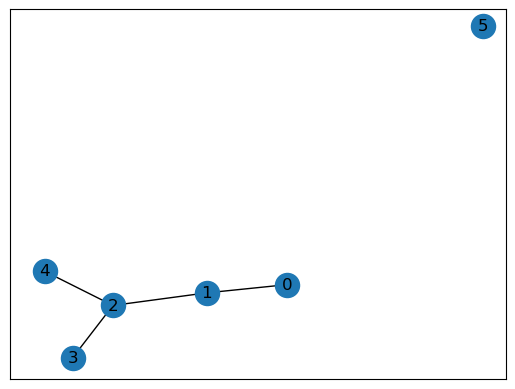

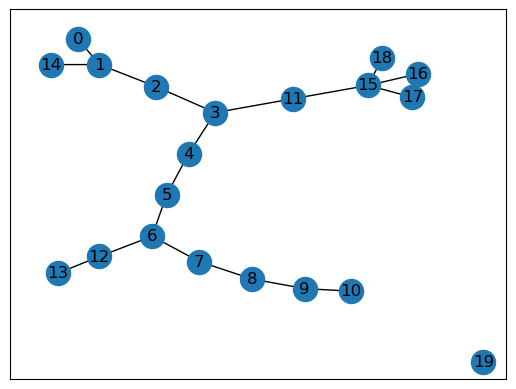

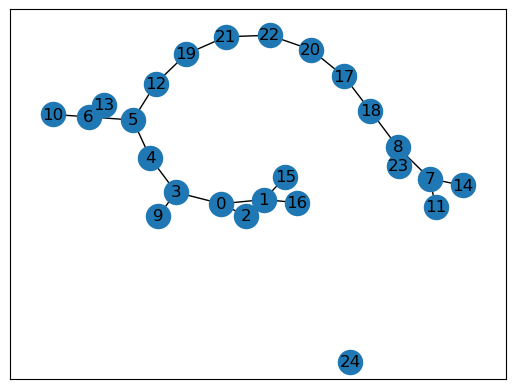

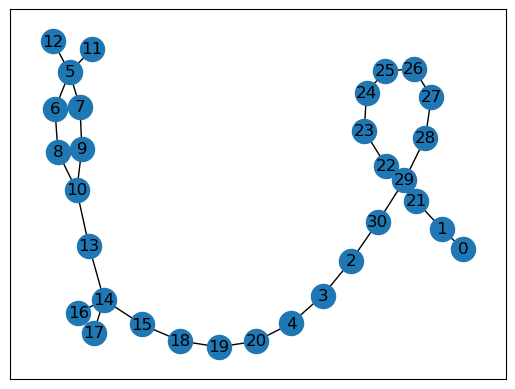

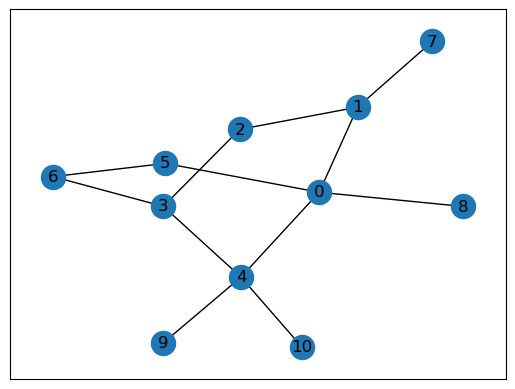

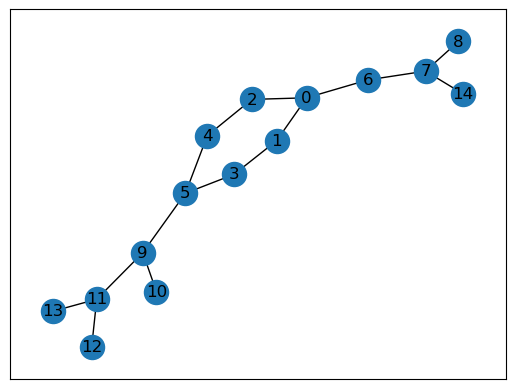

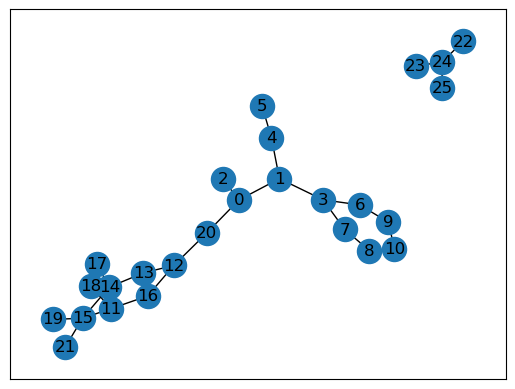

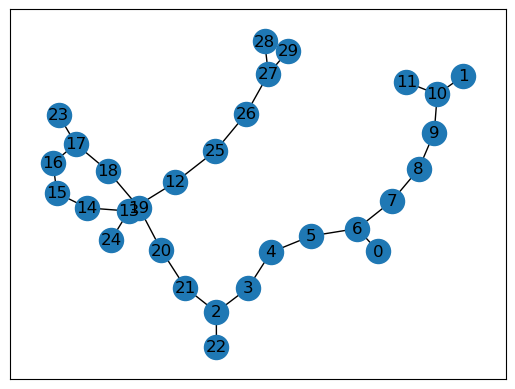

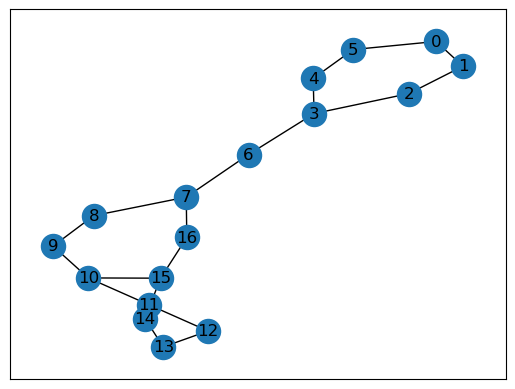

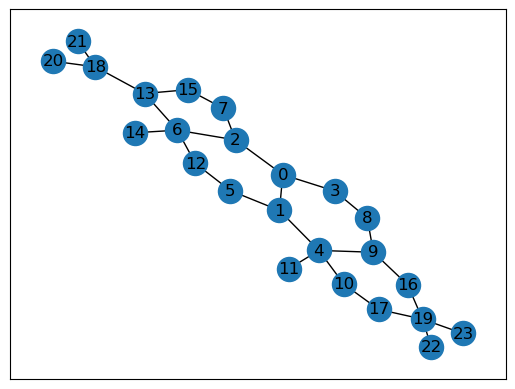

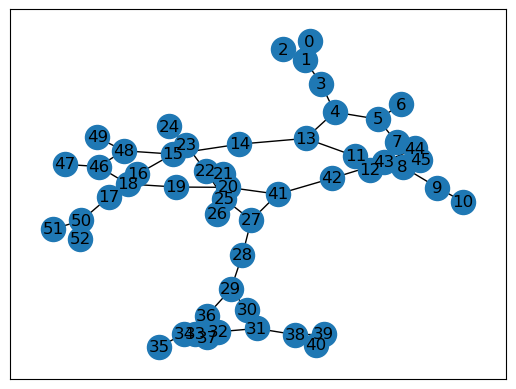

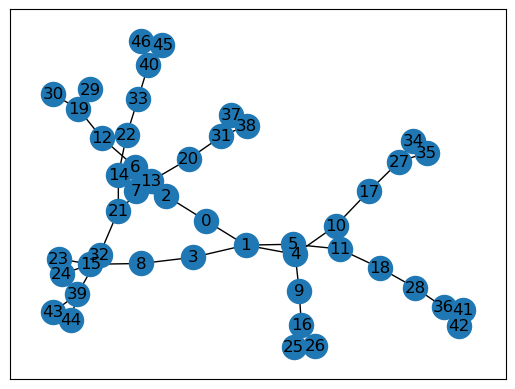

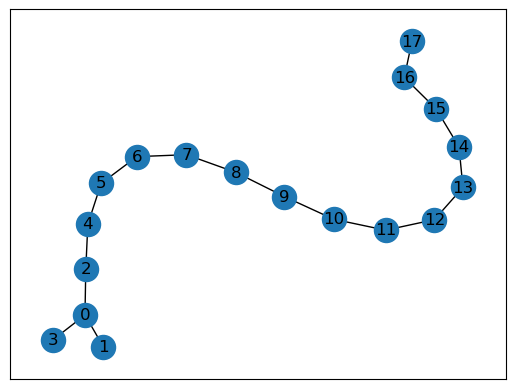

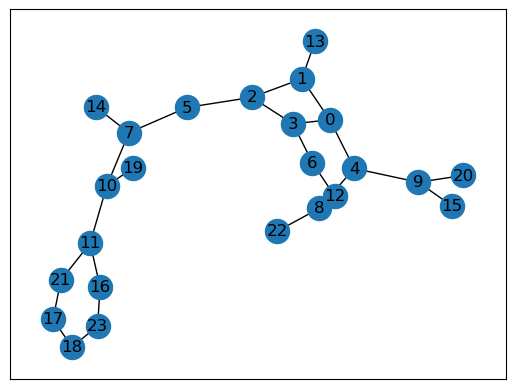

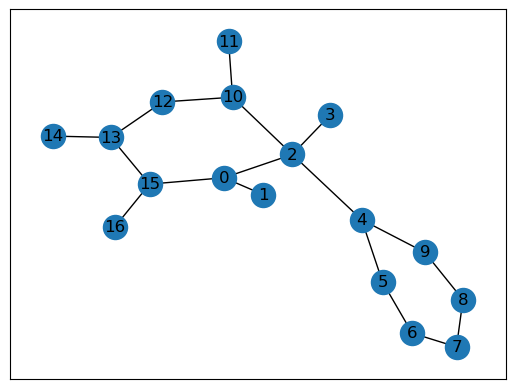

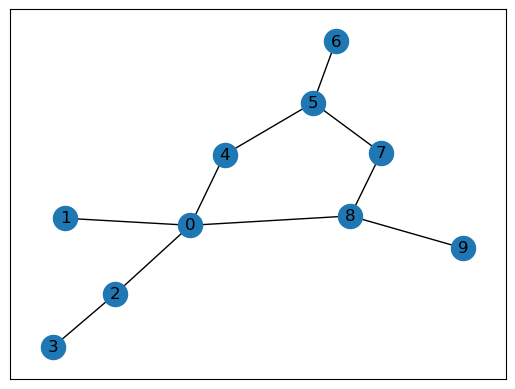

In [ ]:
for graph in bien_predit_0:
    nx.draw_networkx(train_graphs[graph])
    plt.show()
#plt.savefig("filename.png")

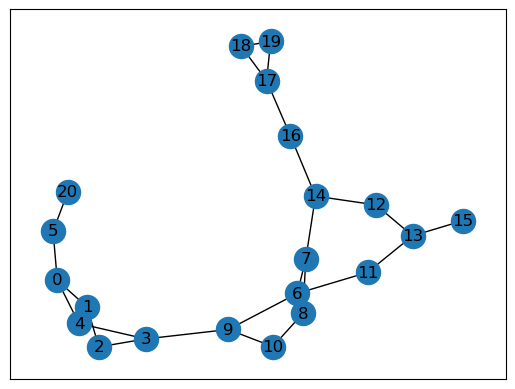

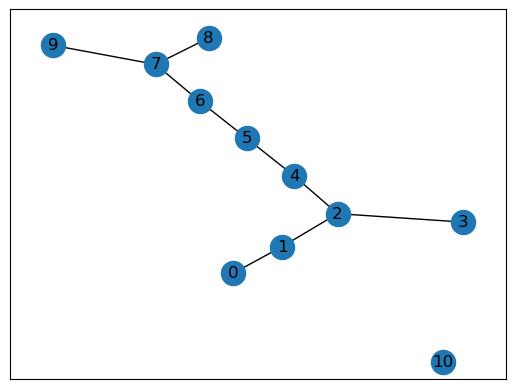

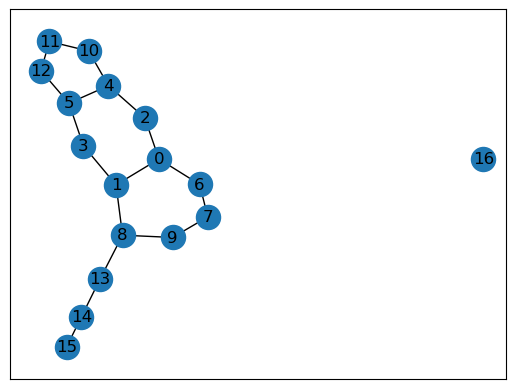

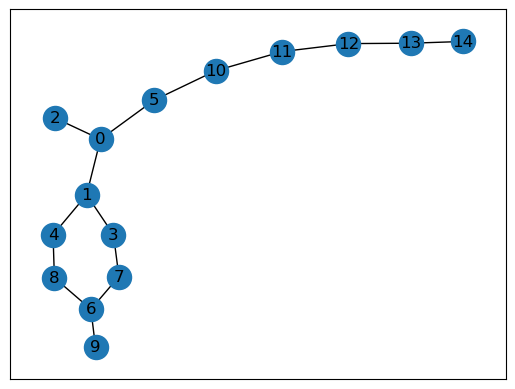

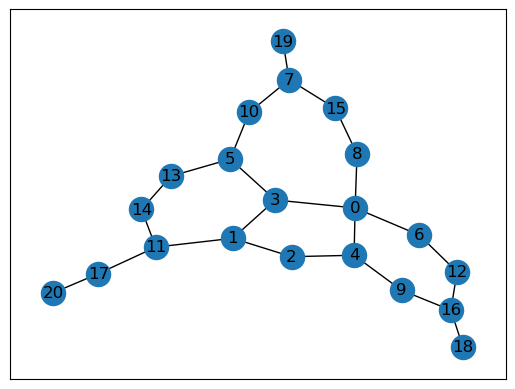

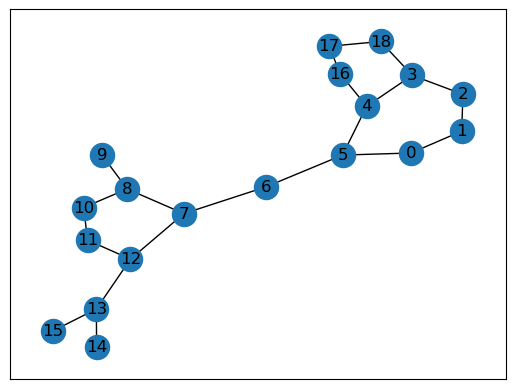

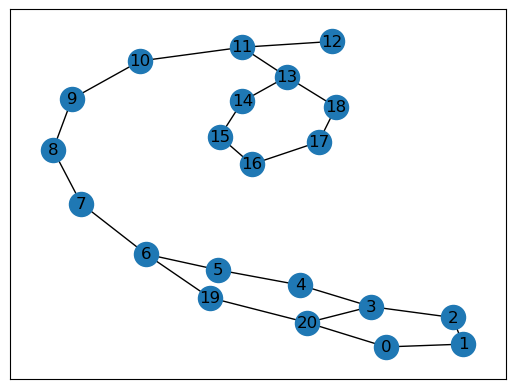

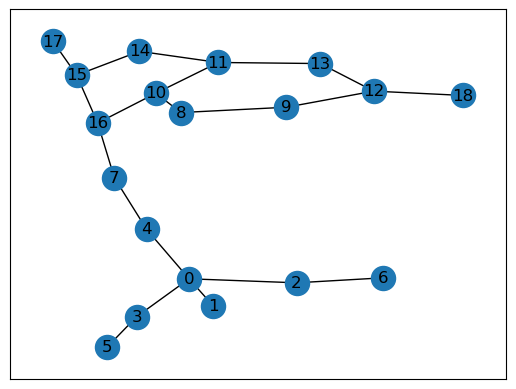

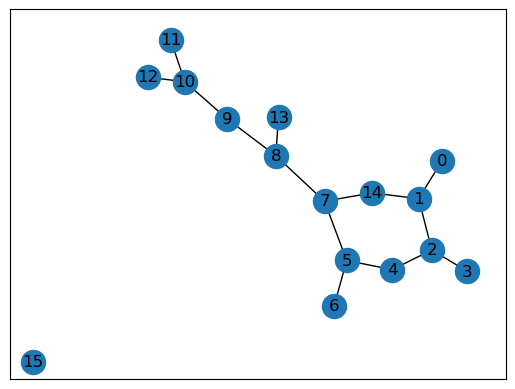

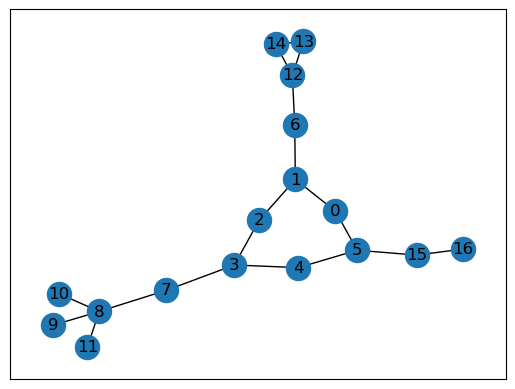

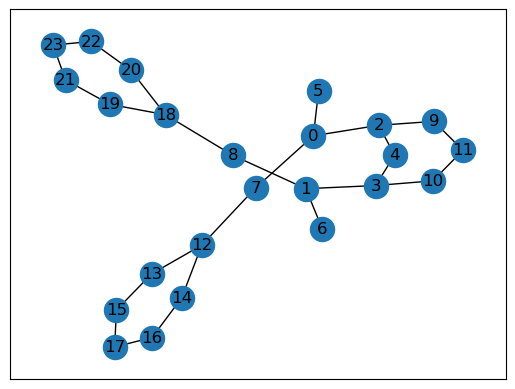

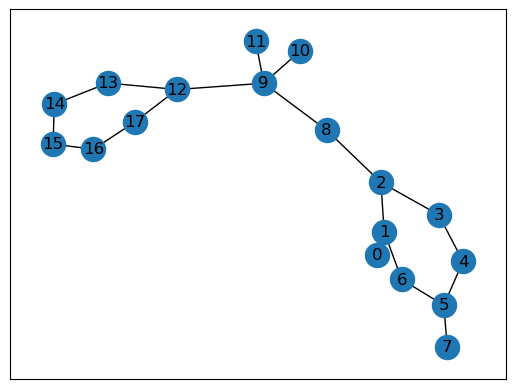

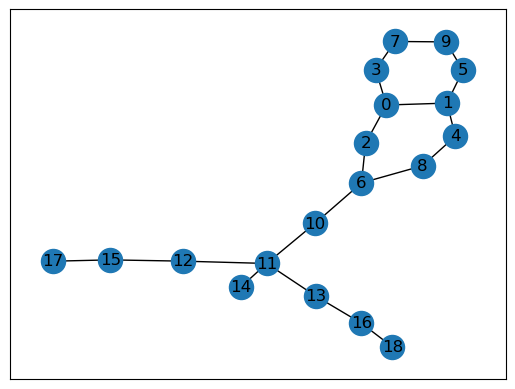

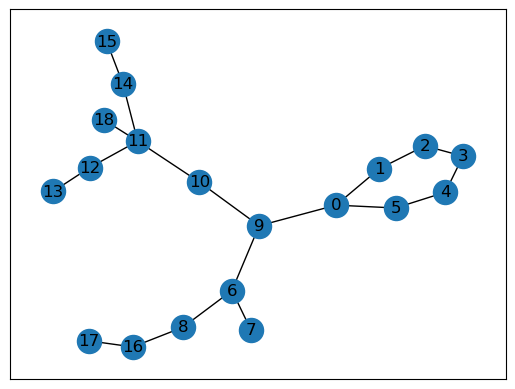

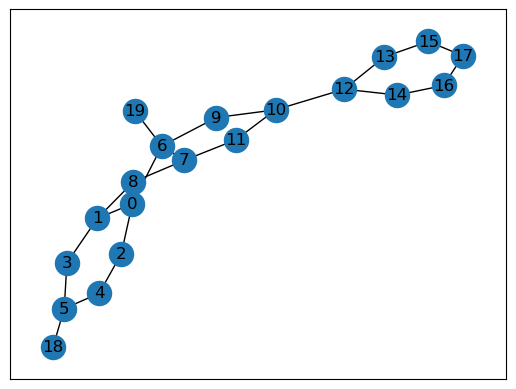

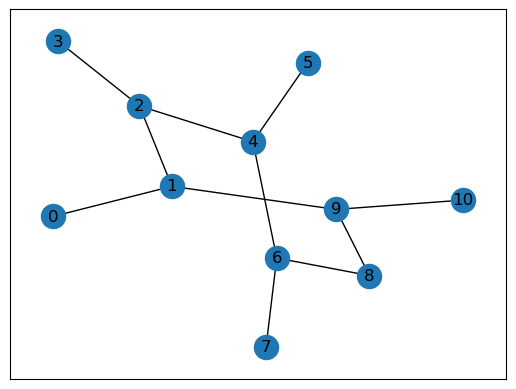

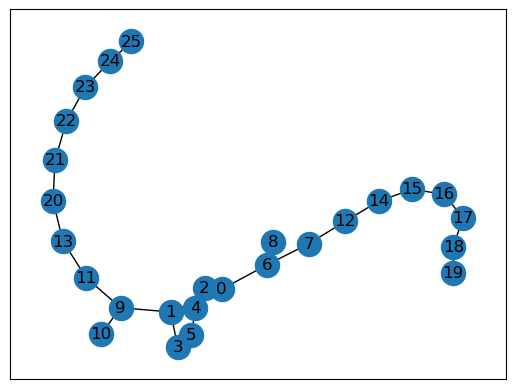

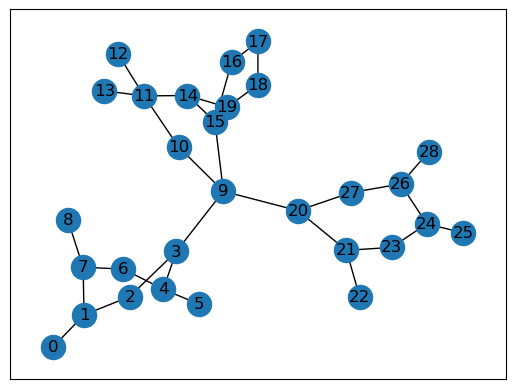

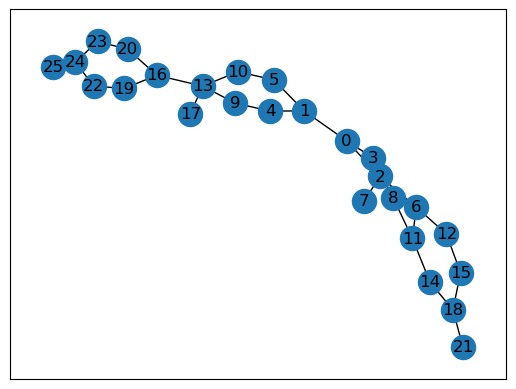

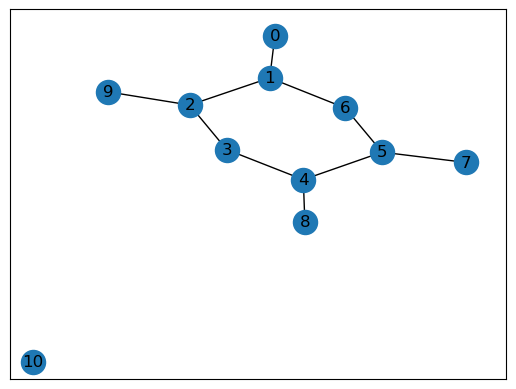

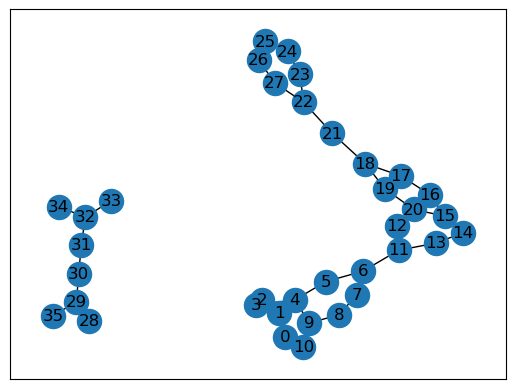

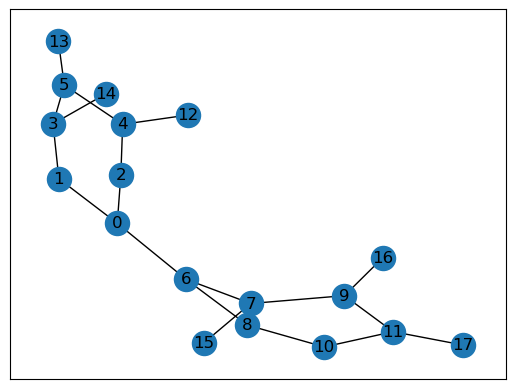

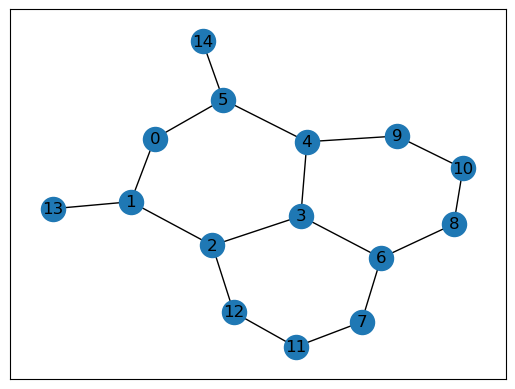

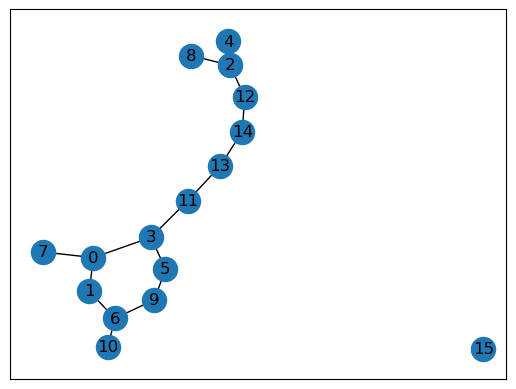

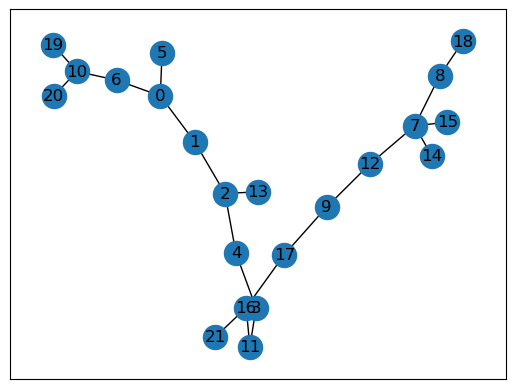

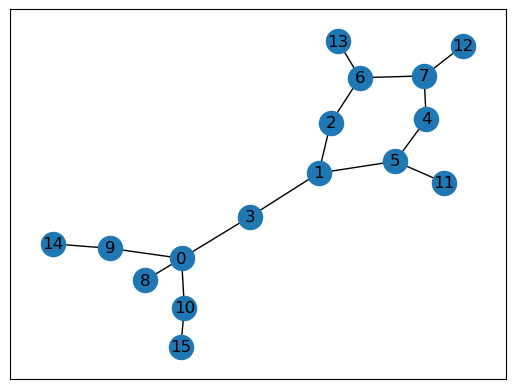

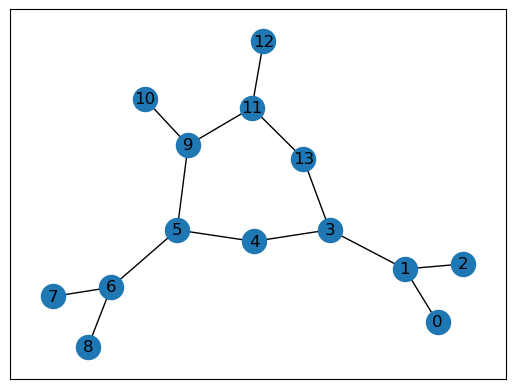

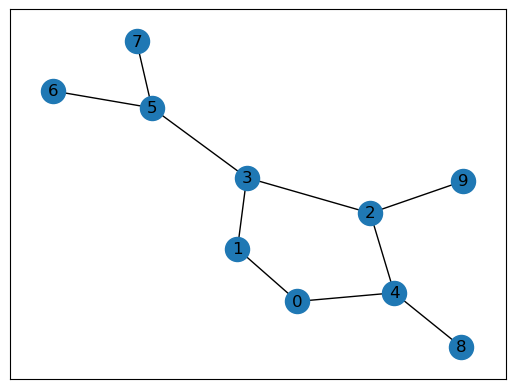

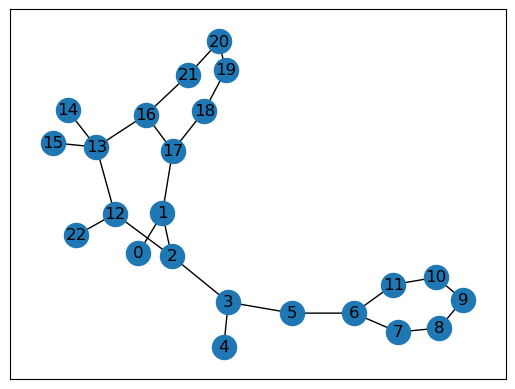

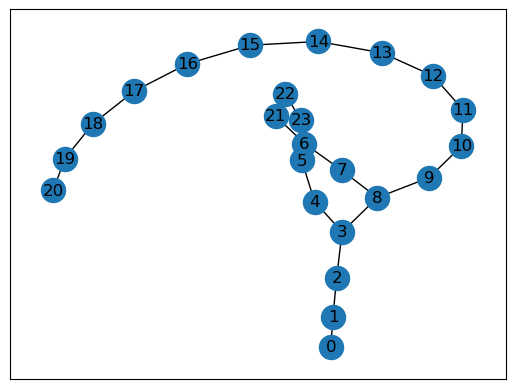

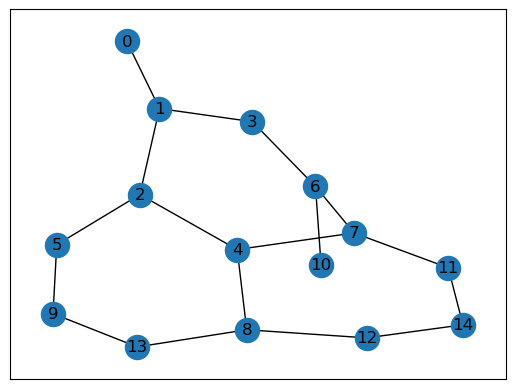

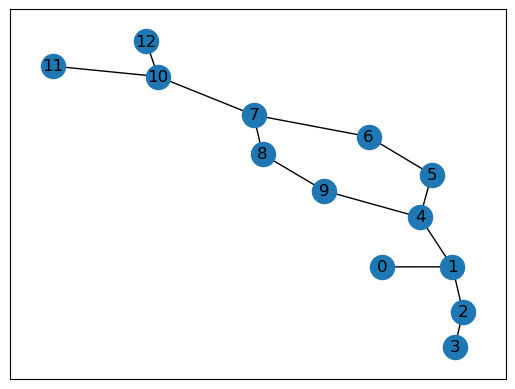

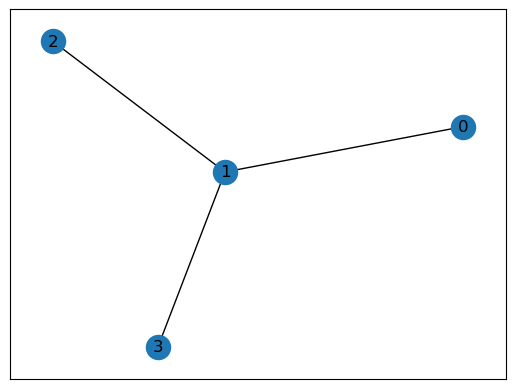

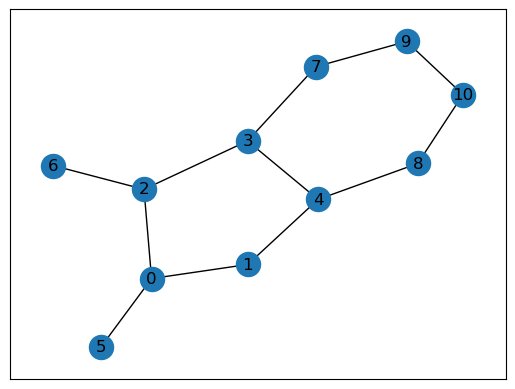

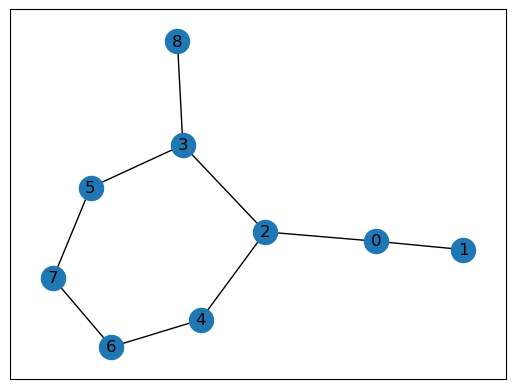

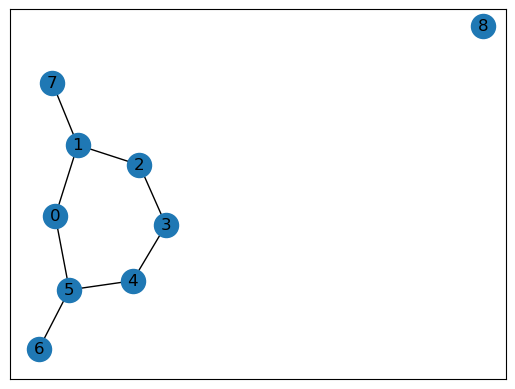

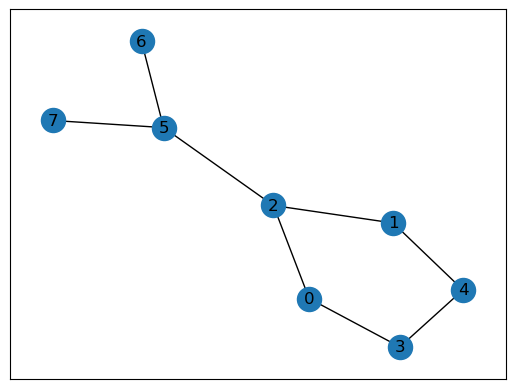

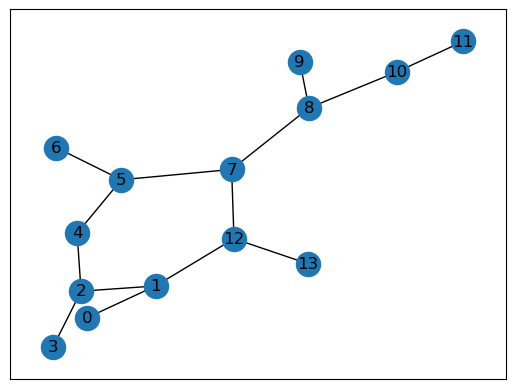

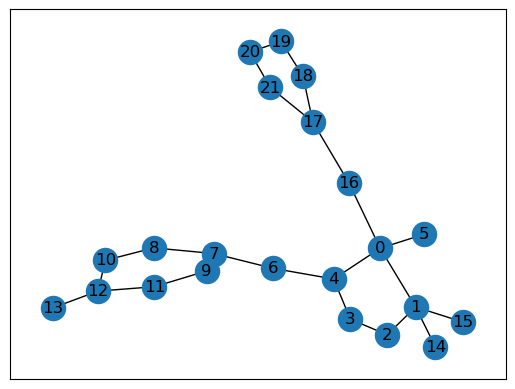

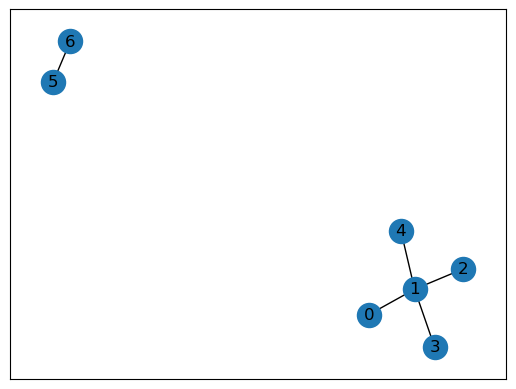

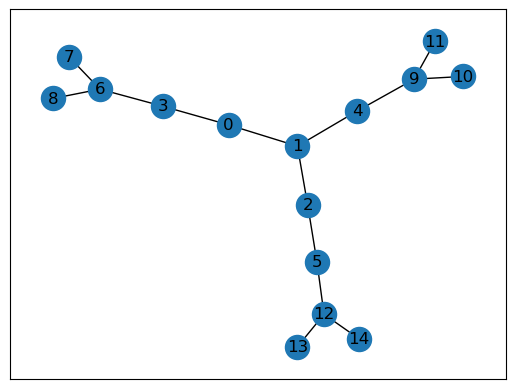

In [ ]:
for graph in mal_predit_1:
    nx.draw_networkx(train_graphs[graph])
    plt.show()
#plt.savefig("filename.png")

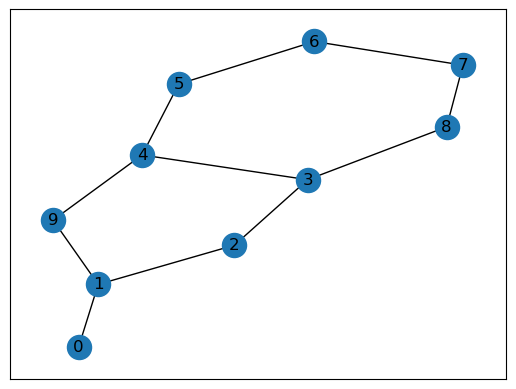

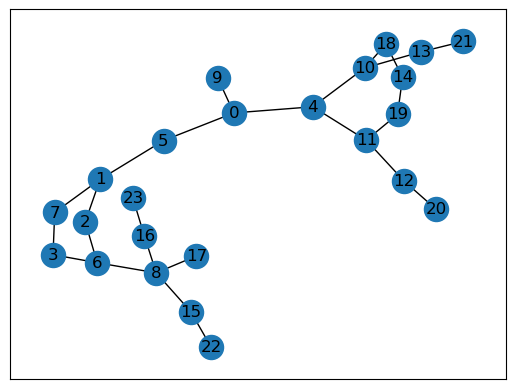

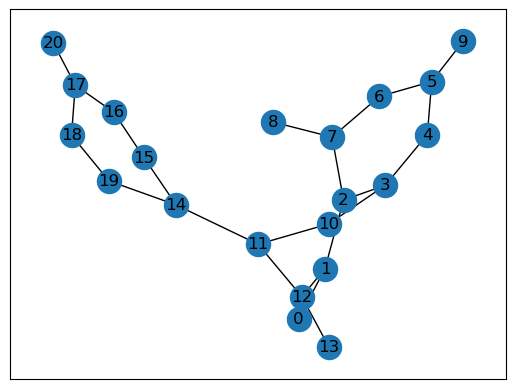

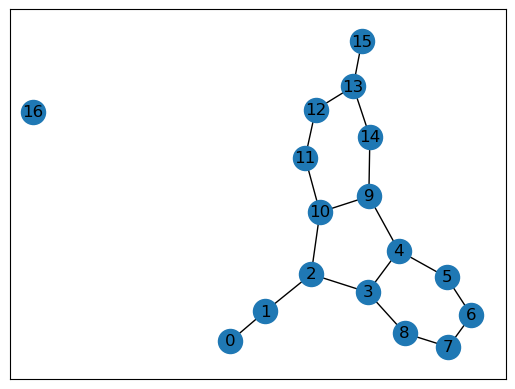

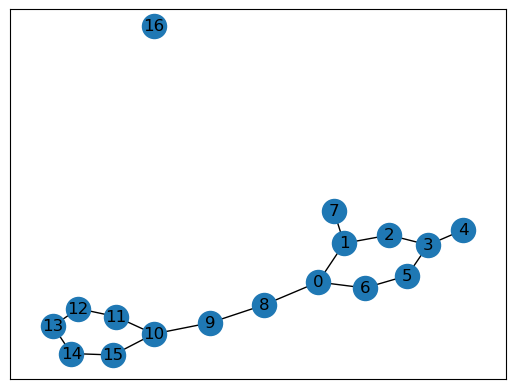

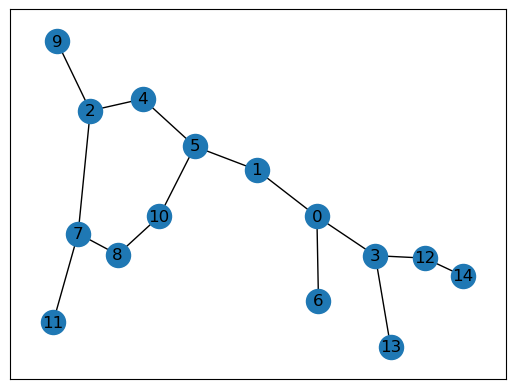

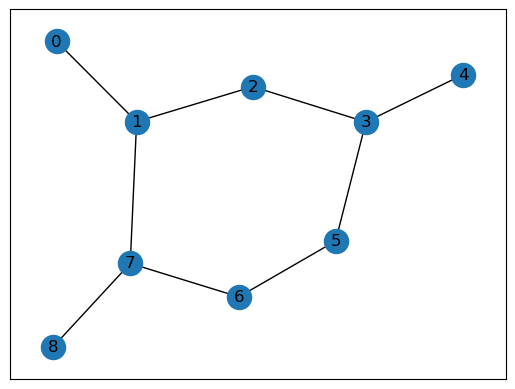

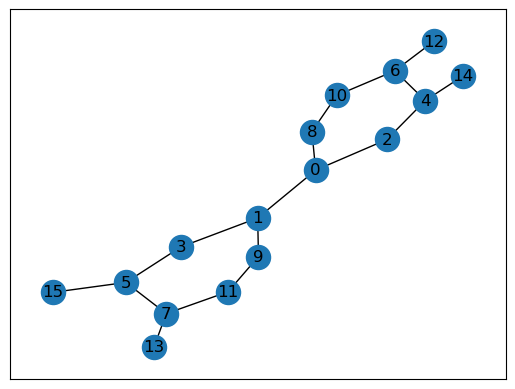

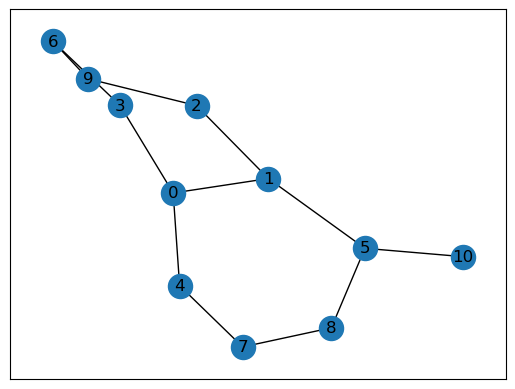

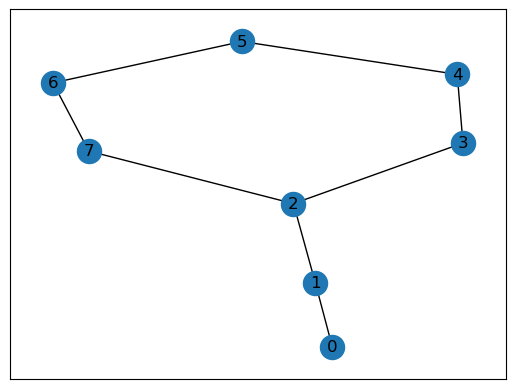

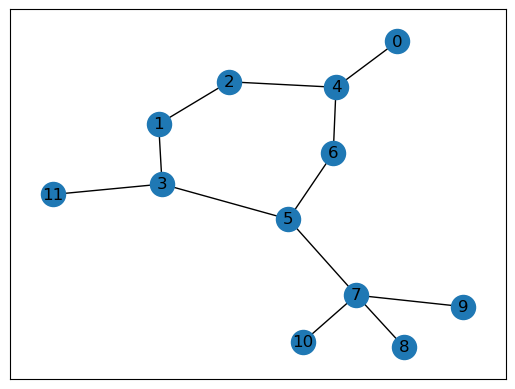

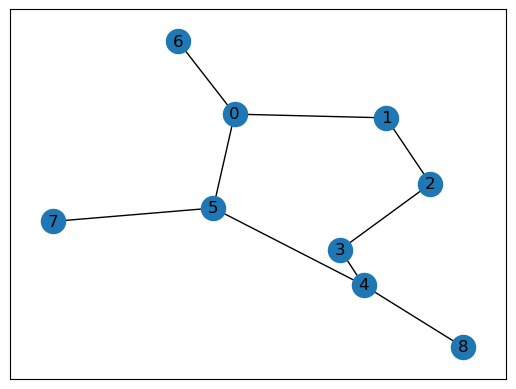

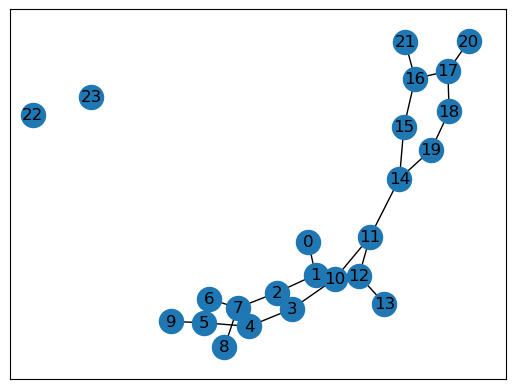

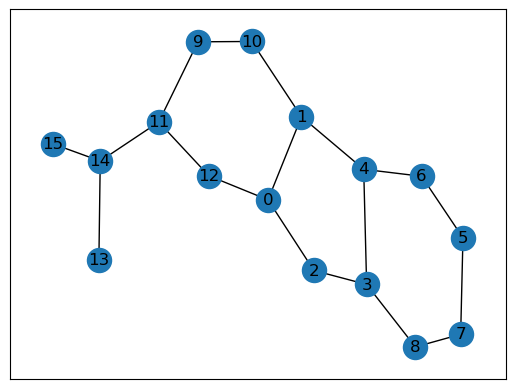

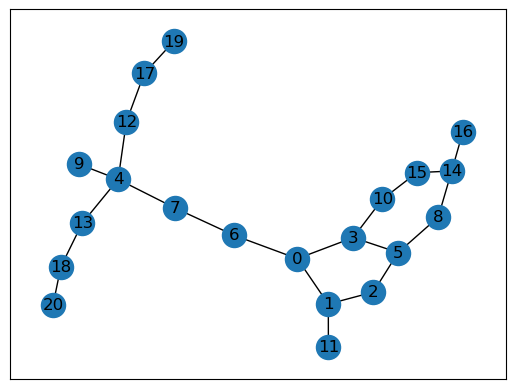

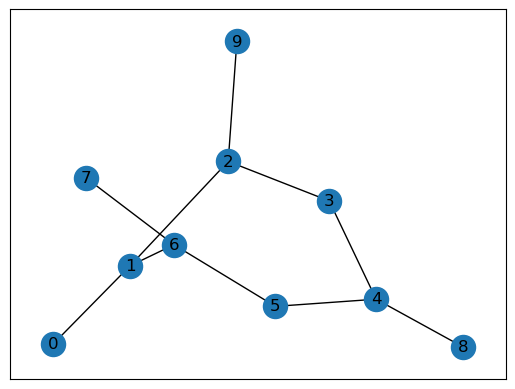

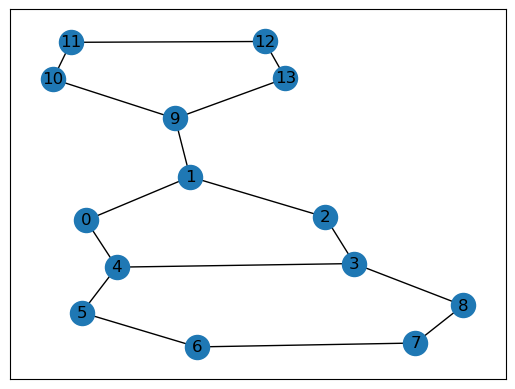

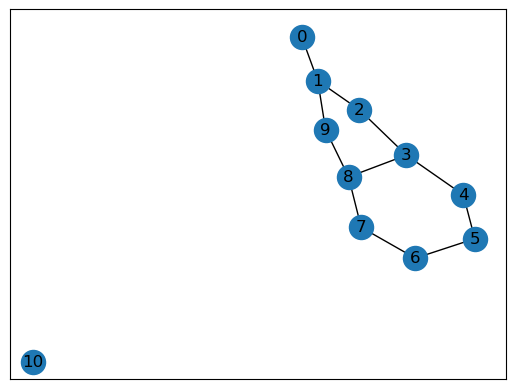

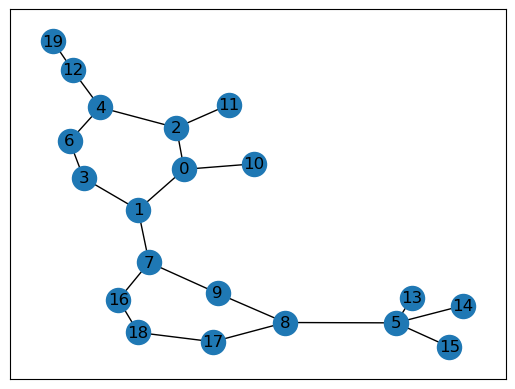

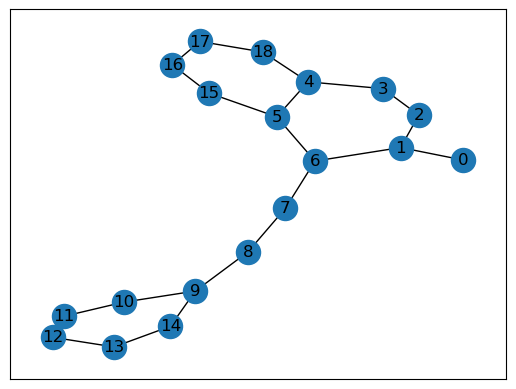

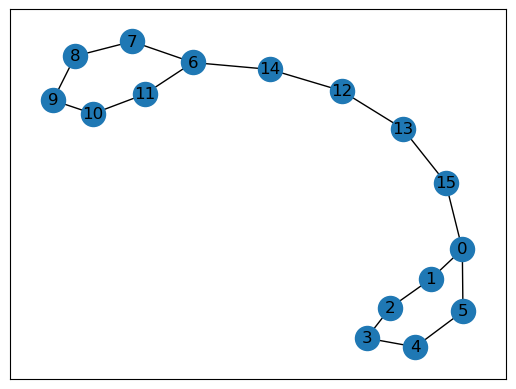

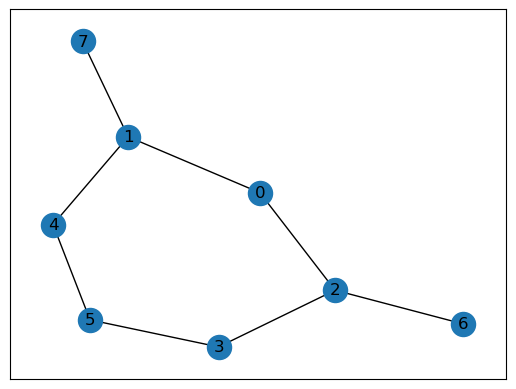

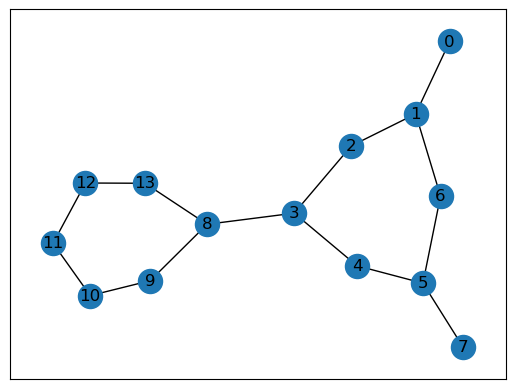

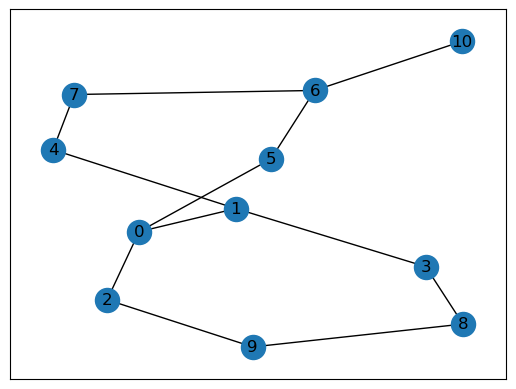

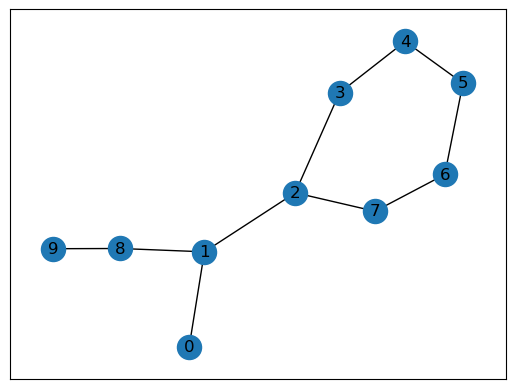

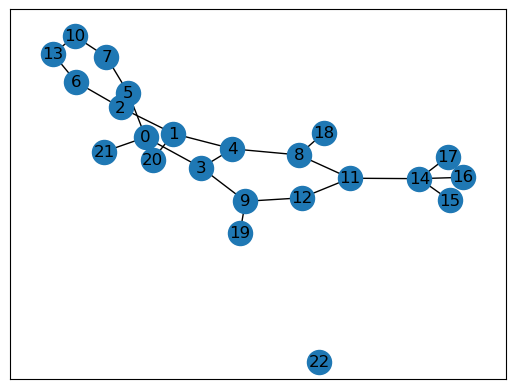

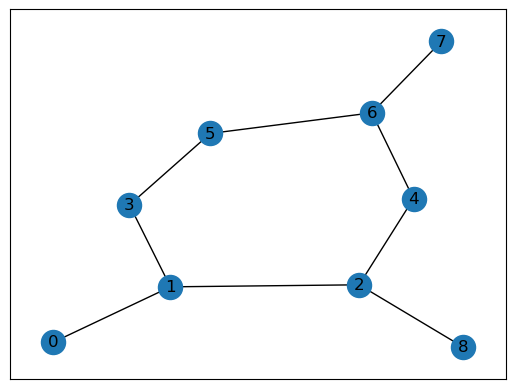

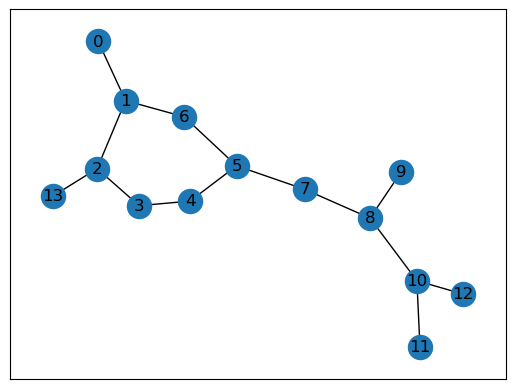

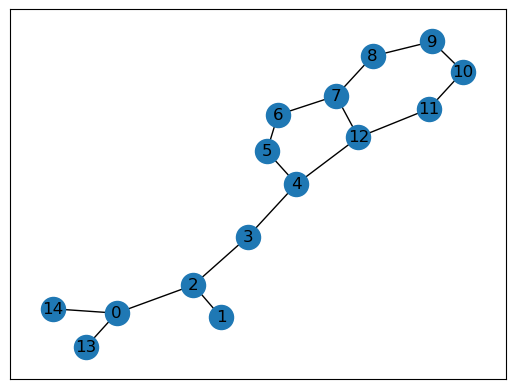

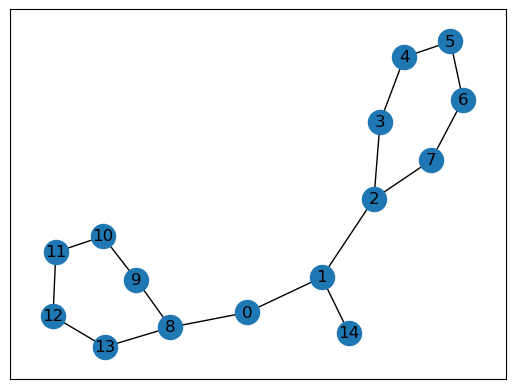

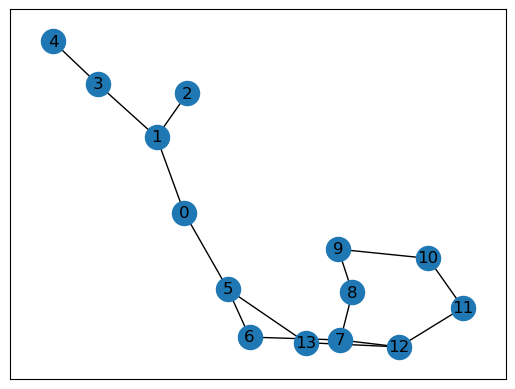

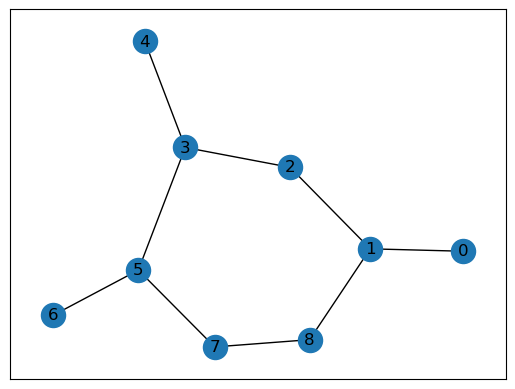

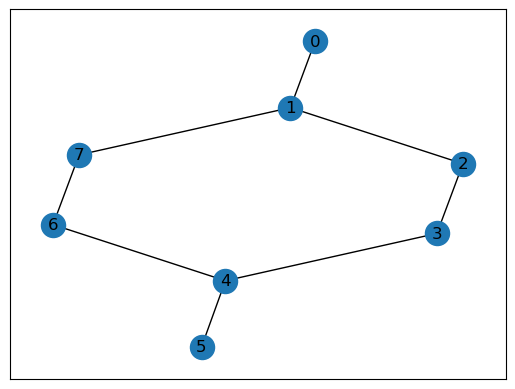

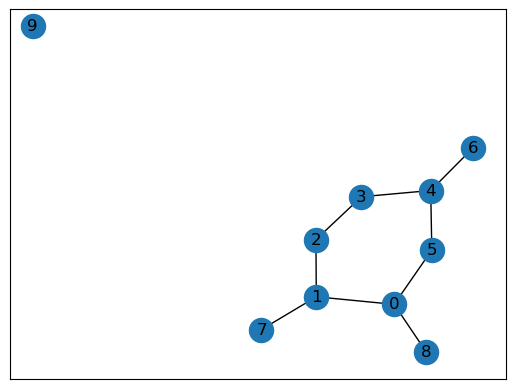

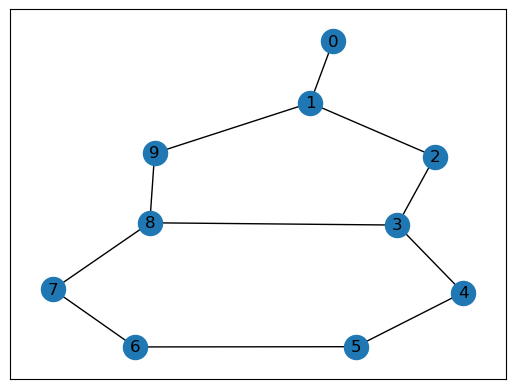

In [ ]:
for graph in bien_predit_1:
    nx.draw_networkx(train_graphs[graph])
    plt.show()
#plt.savefig("filename.png")

In [ ]:
metrics.plot_roc_curve(mem_test_preds,mem_test_labels)
plt.hist(mem_test_preds[np.where(mem_test_labels=1)])
mem_test_index

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

In [1]:

from main import load_data
import networkx as nx
from scipy.sparse.linalg import eigs
import numpy as np

train_graphs, test_graphs, train_labels = load_data()

c:\Users\FRACTAL\Downloads\kernelchallenge-master\main.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_graphs = np.array(pkl.load(file))
c:\Users\FRACTAL\Downloads\kernelchallenge-master\main.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_graphs = np.array(pkl.load(file))


In [7]:
G_product = nx.cartesian_product(train_graphs[5], train_graphs[6])
A = nx.adjacency_matrix(G_product).asfptype()

d = A.shape[0]
A = A.toarray()
A_n = np.linalg.matrix_power(A, 4)
K = np.ones(d).T@A_n@np.ones(d)


C:\Users\FRACTAL\AppData\Local\Temp\ipykernel_18184\2491726524.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G_product).asfptype()


In [8]:
G_product = nx.cartesian_product(train_graphs[5], train_graphs[6])
A = nx.adjacency_matrix(G_product).toarray()

d = A.shape[0]
#A = A.toarray()
A_n = np.linalg.matrix_power(A, 4)
K = np.ones(d).T@A_n@np.ones(d)


C:\Users\FRACTAL\AppData\Local\Temp\ipykernel_18184\947174120.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G_product).toarray()


In [ ]:
vals, vects = eigs(A)
u = vects.T@np.ones(d)
K = u.T@((vals**self.n)*u)